<a href="https://colab.research.google.com/github/sinnarasam/jejudo/blob/jeju.ipynb/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# NanumGothic 폰트 설치
!apt-get -qq install fonts-nanum


In [12]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

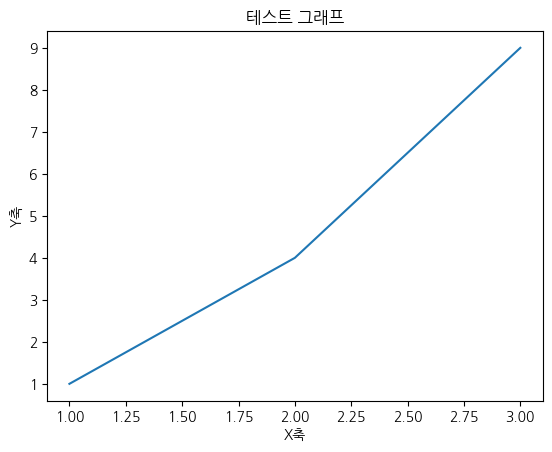

In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# NanumGothic 폰트를 기본 폰트로 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 한글 깨짐 방지를 위해 필요한 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 예제 그래프
plt.plot([1, 2, 3], [1, 4, 9])
plt.title("테스트 그래프")
plt.xlabel("X축")
plt.ylabel("Y축")
plt.show()


In [14]:
# Pandas를 사용하기 위해 라이브러리를 불러옵니다.
import pandas as pd

In [15]:
# 데이터프레임을 직접 만들어 봅니다.
data = {'이름': ['철수', '영희', '민수'], '나이': [15, 16, 15]}
df = pd.DataFrame(data)
print(df)

   이름  나이
0  철수  15
1  영희  16
2  민수  15


In [16]:
# CSV 파일을 불러옵니다.
df = pd.read_csv('sample.csv')
print(df.head())  # 처음 5줄만 보여줍니다.

FileNotFoundError: [Errno 2] No such file or directory: 'sample.csv'

In [17]:
# 데이터프레임의 기본 정보를 확인합니다.
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      3 non-null      object
 1   나이      3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes
None
              나이
count   3.000000
mean   15.333333
std     0.577350
min    15.000000
25%    15.000000
50%    15.000000
75%    15.500000
max    16.000000


In [18]:
print(df['이름'])  # '이름' 열만 선택
print(df[df['나이'] > 15])  # 나이가 15살 초과인 학생만 선택

0    철수
1    영희
2    민수
Name: 이름, dtype: object
   이름  나이
1  영희  16


In [19]:
df['성적'] = [85, 90, 88]
print(df)

   이름  나이  성적
0  철수  15  85
1  영희  16  90
2  민수  15  88


In [20]:
sorted_df = df.sort_values(by='나이')
print(sorted_df)

   이름  나이  성적
0  철수  15  85
2  민수  15  88
1  영희  16  90


In [21]:
df['성적'].fillna(0, inplace=True)  # '성적' 열의 빈 값을 0으로 채우기
print(df)

   이름  나이  성적
0  철수  15  85
1  영희  16  90
2  민수  15  88


<ipython-input-21-3a4110a881b4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['성적'].fillna(0, inplace=True)  # '성적' 열의 빈 값을 0으로 채우기


In [22]:
# 이름이 '민수'인 학생의 나이를 16으로 변경합니다.
df.loc[df['이름'] == '민수', '나이'] = 16
print(df)

   이름  나이  성적
0  철수  15  85
1  영희  16  90
2  민수  16  88


In [23]:
# 나이를 기준으로 성적의 평균을 구해봅니다.
grouped_df = df.groupby('나이')['성적'].mean()
print(grouped_df)

나이
15    85.0
16    89.0
Name: 성적, dtype: float64


In [24]:
# 여러 열을 동시에 선택해봅니다.
selected_columns = df[['이름', '성적']]
print(selected_columns)

   이름  성적
0  철수  85
1  영희  90
2  민수  88


In [25]:
# 새로운 행을 추가합니다.
new_row = {'이름': '지수', '나이': 17, '성적': 92}
# pd.concat to append the new row as a DataFrame
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
print(df)

   이름  나이  성적
0  철수  15  85
1  영희  16  90
2  민수  16  88
3  지수  17  92


In [26]:
# 중복된 데이터를 제거합니다.
df = df.drop_duplicates(subset='이름', keep='first')
print(df)

   이름  나이  성적
0  철수  15  85
1  영희  16  90
2  민수  16  88
3  지수  17  92


In [27]:
# 새로운 데이터프레임을 만들고 기존 데이터프레임에 합칩니다.
extra_data = {'이름': ['철수', '영희'], '동아리': ['음악', '미술']}
extra_df = pd.DataFrame(extra_data)
merged_df = pd.merge(df, extra_df, on='이름', how='left')
print(merged_df)

   이름  나이  성적  동아리
0  철수  15  85   음악
1  영희  16  90   미술
2  민수  16  88  NaN
3  지수  17  92  NaN


In [28]:
# 두 데이터프레임을 위아래로 합칩니다.
df2 = pd.DataFrame({'이름': ['태민'], '나이': [17], '성적': [95]})
concatenated_df = pd.concat([df, df2], ignore_index=True)
print(concatenated_df)

   이름  나이  성적
0  철수  15  85
1  영희  16  90
2  민수  16  88
3  지수  17  92
4  태민  17  95


In [29]:
# 피벗 테이블을 만들어 나이별 성적 평균을 구합니다.
pivot_table = df.pivot_table(values='성적', index='나이', aggfunc='mean')
print(pivot_table)

      성적
나이      
15  85.0
16  89.0
17  92.0


In [30]:
# '이름' 열을 인덱스로 설정해봅니다.
df.set_index('이름', inplace=True)
print(df)

# 인덱스를 다시 기본 설정으로 되돌립니다.
df.reset_index(inplace=True)
print(df)

    나이  성적
이름        
철수  15  85
영희  16  90
민수  16  88
지수  17  92
   이름  나이  성적
0  철수  15  85
1  영희  16  90
2  민수  16  88
3  지수  17  92


In [31]:
# 성적이 90 이상이면 '합격', 그렇지 않으면 '불합격'으로 새 열을 만듭니다.
df['합격 여부'] = df['성적'].apply(lambda x: '합격' if x >= 90 else '불합격')
print(df)

   이름  나이  성적 합격 여부
0  철수  15  85   불합격
1  영희  16  90    합격
2  민수  16  88   불합격
3  지수  17  92    합격


In [32]:
# 1. 나눔고딕 폰트 설치
!apt-get -qq install fonts-nanum

# 2. 설치한 폰트를 matplotlib에서 사용할 수 있도록 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 나눔 고딕 폰트 추가
plt.rcParams['font.family'] = 'NanumGothic'

# 3. 폰트 캐시 리빌드 (수정된 부분)
fm.findSystemFonts(fontpaths=None, fontext='ttf')

plt.rc('font', family= 'NanumGothic')

In [33]:
# prompt: 나눔고딕 폰트 설치여부 검사 코드를 알려줘

import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

for font in font_list:
  if 'NanumGothic' in font:
    print(f"나눔고딕 폰트가 설치되어 있습니다: {font}")
    break
else:
  print("나눔고딕 폰트가 설치되어 있지 않습니다.")


나눔고딕 폰트가 설치되어 있습니다: /usr/share/fonts/truetype/nanum/NanumGothic.ttf


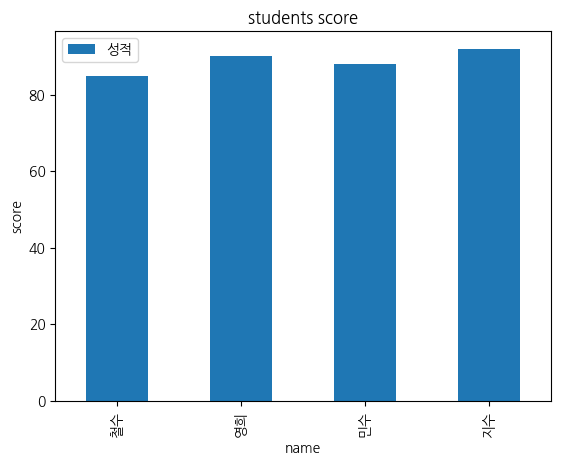

In [34]:
# 이름을 x축, 성적을 y축으로 하는 막대 그래프를 그립니다.
df.plot(kind='bar', x='이름', y='성적', title='students score')
plt.xlabel('name')
plt.ylabel('score')
plt.show()

In [35]:
# 날짜 데이터를 생성하고 처리합니다.
dates = ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01']  # Added a fourth date
df['등록일'] = pd.to_datetime(dates)
print(df)

# 연도 추출하기
df['연도'] = df['등록일'].dt.year
print(df)

   이름  나이  성적 합격 여부        등록일
0  철수  15  85   불합격 2023-01-01
1  영희  16  90    합격 2023-02-01
2  민수  16  88   불합격 2023-03-01
3  지수  17  92    합격 2023-04-01
   이름  나이  성적 합격 여부        등록일    연도
0  철수  15  85   불합격 2023-01-01  2023
1  영희  16  90    합격 2023-02-01  2023
2  민수  16  88   불합격 2023-03-01  2023
3  지수  17  92    합격 2023-04-01  2023


In [36]:
import numpy as np

# 성적이 90 이상이면 '우수', 그렇지 않으면 '보통'으로 구분하는 열을 만듭니다.
df['성적 평가'] = np.where(df['성적'] >= 90, '우수', '보통')
print(df)

   이름  나이  성적 합격 여부        등록일    연도 성적 평가
0  철수  15  85   불합격 2023-01-01  2023    보통
1  영희  16  90    합격 2023-02-01  2023    우수
2  민수  16  88   불합격 2023-03-01  2023    보통
3  지수  17  92    합격 2023-04-01  2023    우수


In [37]:
# 성적의 누적 합을 계산합니다.
df['성적 누적 합'] = df['성적'].cumsum()
print(df)

   이름  나이  성적 합격 여부        등록일    연도 성적 평가  성적 누적 합
0  철수  15  85   불합격 2023-01-01  2023    보통       85
1  영희  16  90    합격 2023-02-01  2023    우수      175
2  민수  16  88   불합격 2023-03-01  2023    보통      263
3  지수  17  92    합격 2023-04-01  2023    우수      355


In [38]:
# 데이터프레임에서 랜덤하게 2개의 행을 샘플링합니다.
sample_df = df.sample(n=2)
print(sample_df)

   이름  나이  성적 합격 여부        등록일    연도 성적 평가  성적 누적 합
3  지수  17  92    합격 2023-04-01  2023    우수      355
2  민수  16  88   불합격 2023-03-01  2023    보통      263


In [39]:
# 열 이름을 변경합니다.
df.rename(columns={'이름': '학생 이름', '성적': '시험 성적'}, inplace=True)
print(df)

  학생 이름  나이  시험 성적 합격 여부        등록일    연도 성적 평가  성적 누적 합
0    철수  15     85   불합격 2023-01-01  2023    보통       85
1    영희  16     90    합격 2023-02-01  2023    우수      175
2    민수  16     88   불합격 2023-03-01  2023    보통      263
3    지수  17     92    합격 2023-04-01  2023    우수      355


In [40]:
# 특정 이름에 해당하는 데이터만 필터링합니다.
filtered_df = df[df['학생 이름'].isin(['철수', '영희'])]
print(filtered_df)

  학생 이름  나이  시험 성적 합격 여부        등록일    연도 성적 평가  성적 누적 합
0    철수  15     85   불합격 2023-01-01  2023    보통       85
1    영희  16     90    합격 2023-02-01  2023    우수      175


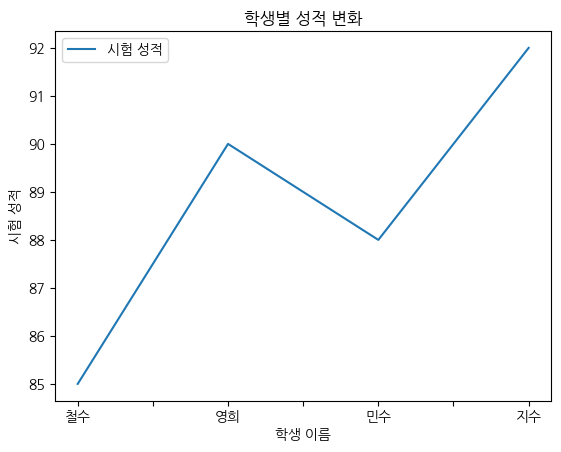

In [41]:
import matplotlib.pyplot as plt

# 성적의 추세를 선 그래프로 표현합니다.
df.plot(kind='line', x='학생 이름', y='시험 성적', title='학생별 성적 변화')
plt.xlabel('학생 이름')
plt.ylabel('시험 성적')
plt.show()

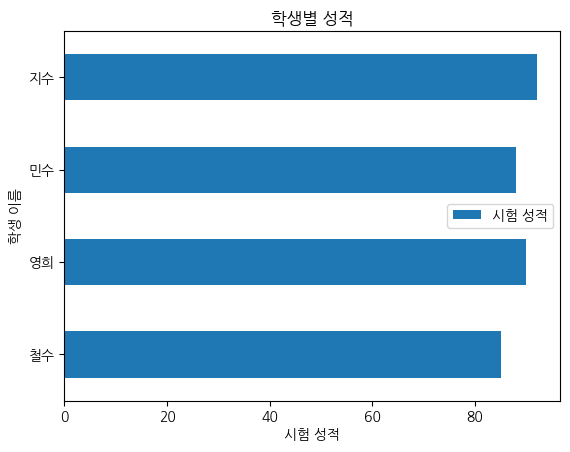

In [42]:
# 수평 막대 그래프로 학생별 성적을 표현합니다.
df.plot(kind='barh', x='학생 이름', y='시험 성적', title='학생별 성적')
plt.xlabel('시험 성적')
plt.ylabel('학생 이름')
plt.show()

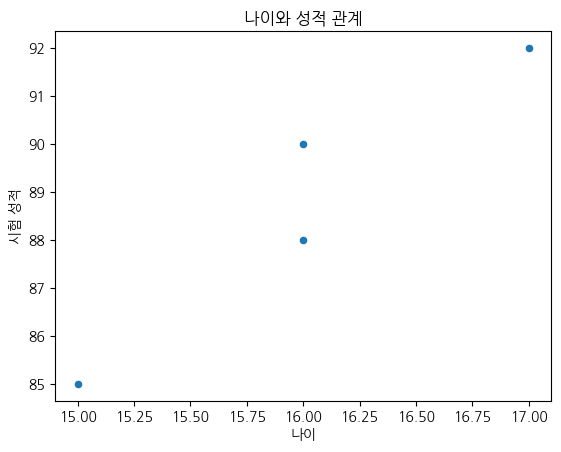

In [43]:
# 나이와 성적의 관계를 산점도로 표현합니다.
df.plot(kind='scatter', x='나이', y='시험 성적', title='나이와 성적 관계')
plt.xlabel('나이')
plt.ylabel('시험 성적')
plt.show()

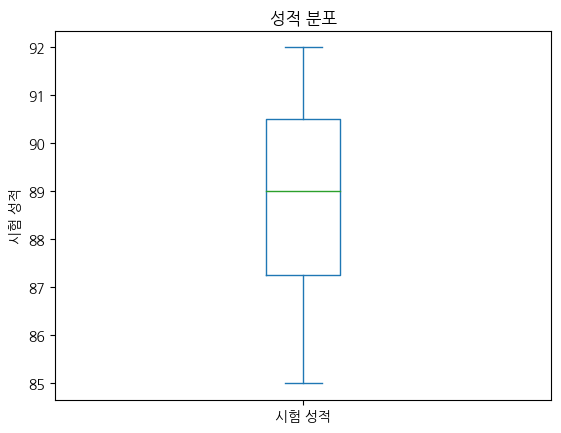

In [44]:
# 성적 분포를 상자 그림으로 표현합니다.
df['시험 성적'].plot(kind='box', title='성적 분포')
plt.ylabel('시험 성적')
plt.show()

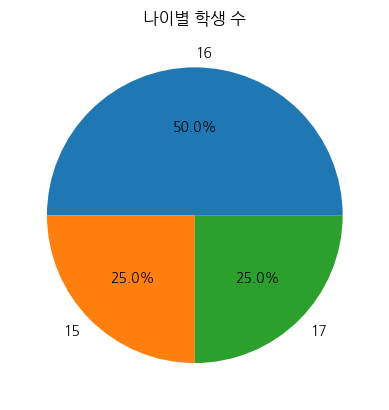

In [45]:
# 나이별 학생 수를 파이 차트로 표현합니다.
age_counts = df['나이'].value_counts()
age_counts.plot(kind='pie', title='나이별 학생 수', autopct='%1.1f%%')
plt.ylabel('')  # 파이 차트에서는 y축 레이블을 지웁니다.
plt.show()

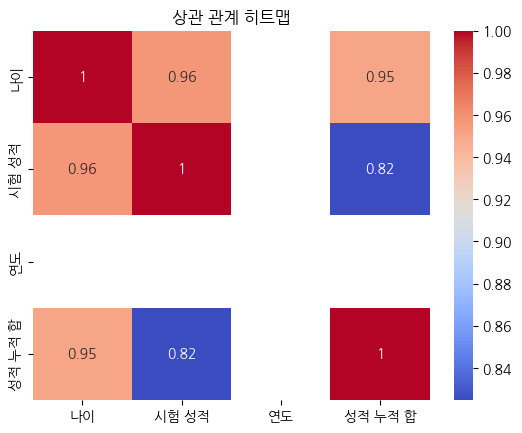

In [48]:
import seaborn as sns

# 데이터의 상관 관계를 히트맵으로 표현합니다.
# numeric_only=True를 추가하여 숫자형 데이터만 고려합니다.
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('상관 관계 히트맵')
plt.show()

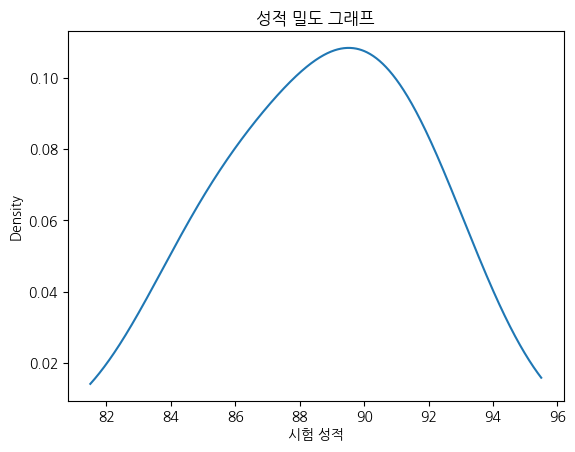

In [49]:
# 성적의 밀도 그래프를 그립니다.
df['시험 성적'].plot(kind='kde', title='성적 밀도 그래프')
plt.xlabel('시험 성적')
plt.show()

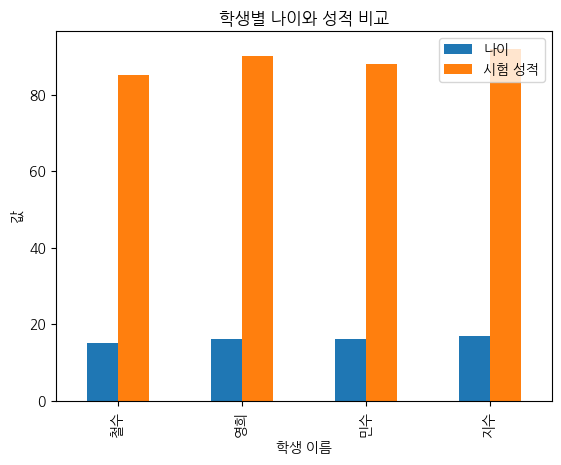

In [50]:
# 학생별 나이와 성적을 두 막대 그래프로 표현합니다.
df.set_index('학생 이름')[['나이', '시험 성적']].plot(kind='bar', title='학생별 나이와 성적 비교')
plt.xlabel('학생 이름')
plt.ylabel('값')
plt.show()

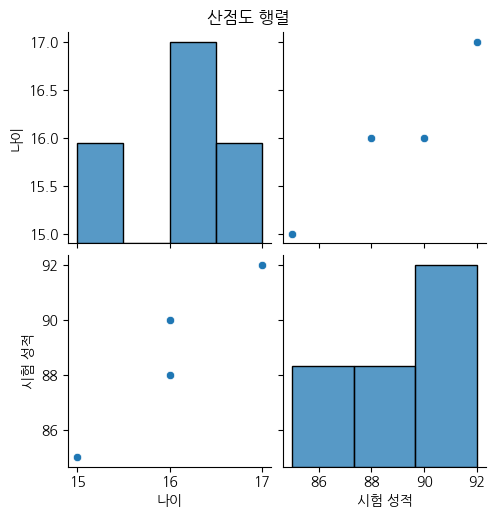

In [51]:
# 여러 변수 간 관계를 산점도 행렬로 표현합니다.
sns.pairplot(df[['나이', '시험 성적']])
plt.suptitle('산점도 행렬', y=1.02)
plt.show()

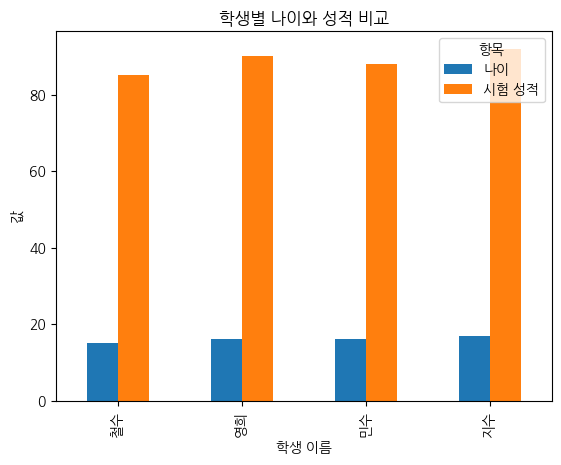

In [52]:
import matplotlib.pyplot as plt

# 여러 개의 열을 가진 막대 그래프 예시
df.set_index('학생 이름')[['나이', '시험 성적']].plot(kind='bar', title='학생별 나이와 성적 비교')
plt.xlabel('학생 이름')
plt.ylabel('값')

# 범례 설정 (위치를 'upper right'로 설정)
plt.legend(title='항목', loc='upper right')
plt.show()

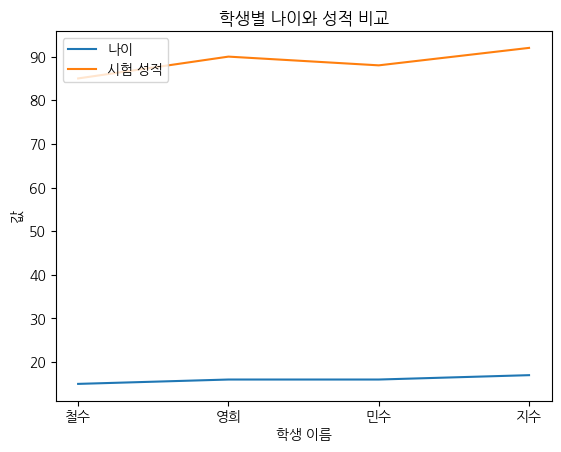

In [53]:
# 나이와 성적을 각각 선 그래프로 나타내기
plt.plot(df['학생 이름'], df['나이'], label='나이')
plt.plot(df['학생 이름'], df['시험 성적'], label='시험 성적')
plt.xlabel('학생 이름')
plt.ylabel('값')
plt.title('학생별 나이와 성적 비교')

# 범례 추가 (기본 위치는 오른쪽 상단)
plt.legend(loc='upper left')  # loc 매개변수를 통해 위치를 설정할 수 있습니다.
plt.show()

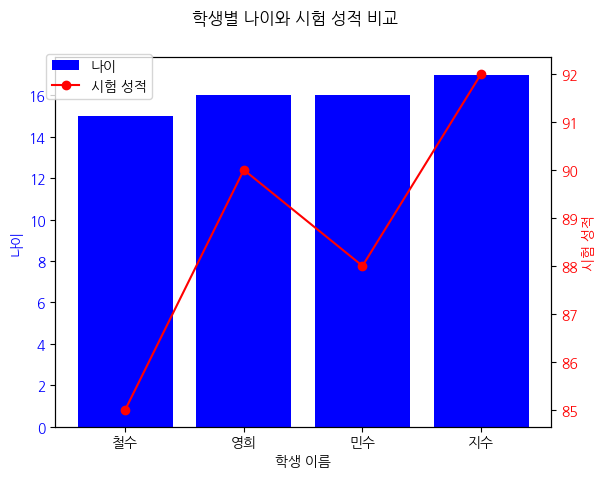

In [54]:
# x축은 학생 이름, 왼쪽 y축은 나이, 오른쪽 y축은 시험 성적을 표시
fig, ax1 = plt.subplots()

# 왼쪽 y축: 나이 그래프
ax1.bar(df['학생 이름'], df['나이'], color='blue', label='나이')
ax1.set_xlabel('학생 이름')
ax1.set_ylabel('나이', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 오른쪽 y축: 시험 성적 그래프
ax2 = ax1.twinx()
ax2.plot(df['학생 이름'], df['시험 성적'], color='red', marker='o', label='시험 성적')
ax2.set_ylabel('시험 성적', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle("학생별 나이와 시험 성적 비교")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()

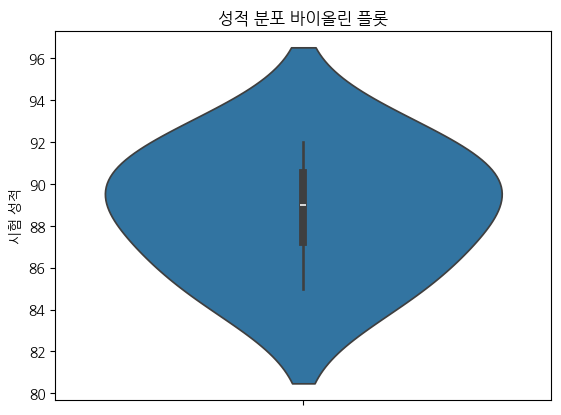

In [55]:
import seaborn as sns

# 성적 분포를 바이올린 플롯으로 표현합니다.
sns.violinplot(y=df['시험 성적'])
plt.title('성적 분포 바이올린 플롯')
plt.show()

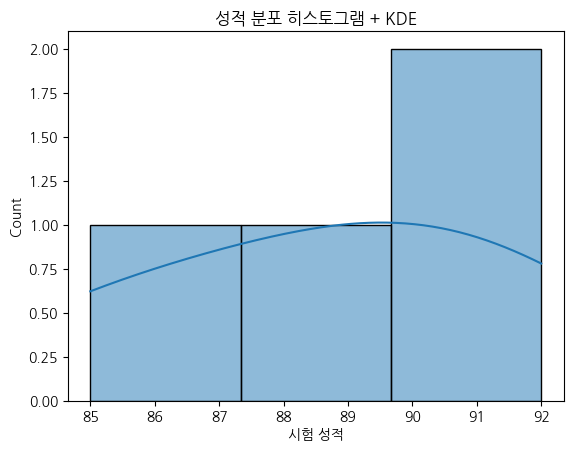

In [56]:
# 히스토그램과 커널 밀도 그래프를 동시에 표현합니다.
sns.histplot(df['시험 성적'], kde=True)
plt.title('성적 분포 히스토그램 + KDE')
plt.xlabel('시험 성적')
plt.show()

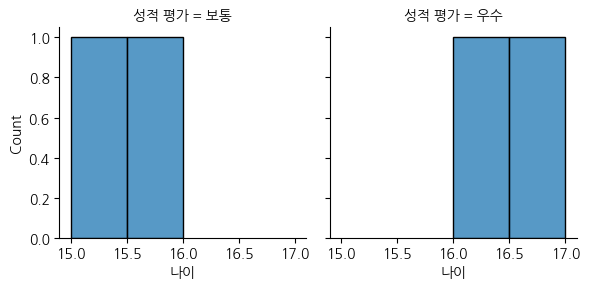

In [57]:
# '성적 평가'에 따라 나이 분포를 파셋 그리드로 표시합니다.
df['성적 평가'] = df['시험 성적'].apply(lambda x: '우수' if x >= 90 else '보통')
g = sns.FacetGrid(df, col='성적 평가')
g.map(sns.histplot, '나이')
plt.show()

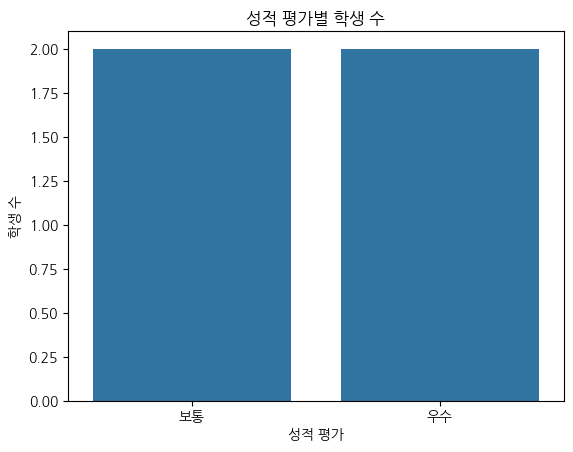

In [58]:
# 성적 평가별 학생 수를 막대 그래프로 표현합니다.
sns.countplot(x='성적 평가', data=df)
plt.title('성적 평가별 학생 수')
plt.xlabel('성적 평가')
plt.ylabel('학생 수')
plt.show()

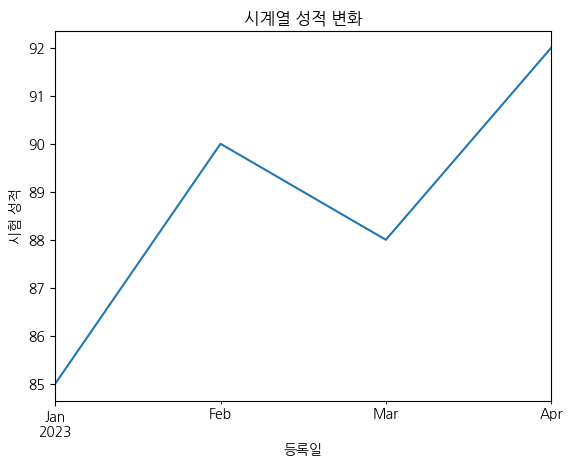

In [59]:
# 날짜별 성적을 라인 플롯으로 표현합니다.
df['등록일'] = pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01'])
df.set_index('등록일', inplace=True)
df['시험 성적'].plot(title='시계열 성적 변화')
plt.ylabel('시험 성적')
plt.show()

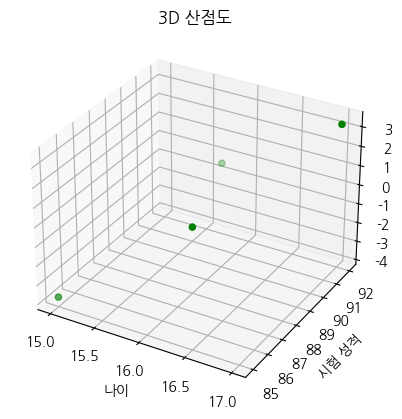

In [61]:
# 필요한 모듈을 가져옵니다.
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 기존 데이터프레임에 '평균 대비 성적' 열이 없는 경우, 추가합니다.
# 예시: 시험 성적을 기준으로 평균 대비 성적을 계산하여 추가
if '평균 대비 성적' not in df.columns:
    df['평균 대비 성적'] = df['시험 성적'] - df['시험 성적'].mean()

# 3D 산점도를 생성합니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 나이, 시험 성적, 평균 대비 성적으로 3D 산점도 표현
ax.scatter(df['나이'], df['시험 성적'], df['평균 대비 성적'], color='green')
ax.set_xlabel('나이')
ax.set_ylabel('시험 성적')
ax.set_zlabel('평균 대비 성적')
plt.title("3D 산점도")
plt.show()

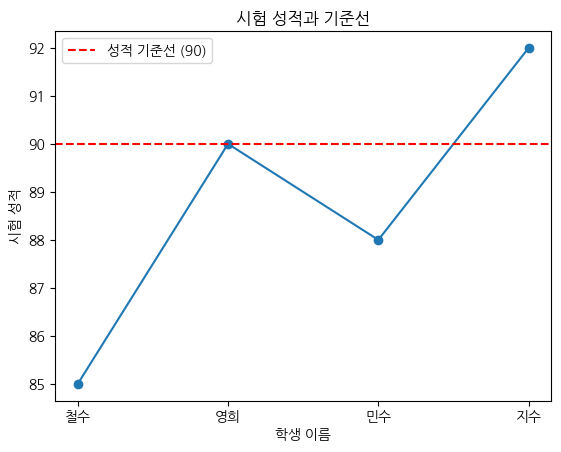

In [62]:
# 특정 성적 기준선 추가
plt.plot(df['학생 이름'], df['시험 성적'], marker='o')
plt.axhline(y=90, color='r', linestyle='--', label='성적 기준선 (90)')
plt.xlabel('학생 이름')
plt.ylabel('시험 성적')
plt.legend()
plt.title('시험 성적과 기준선')
plt.show()

<ipython-input-63-88263e1e4ea8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['시험 성적'], shade=True)


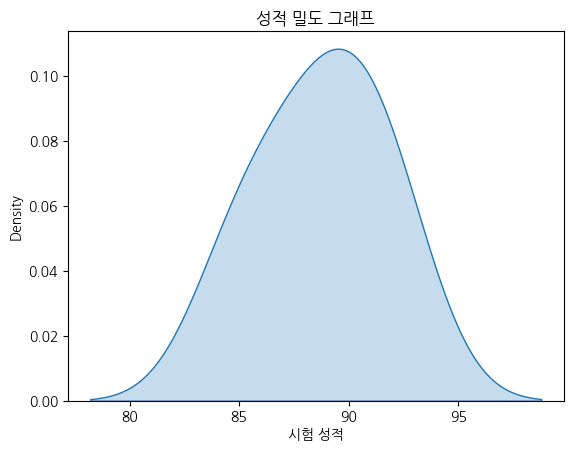

In [63]:
# 성적 데이터의 밀도 그래프를 그립니다.
sns.kdeplot(df['시험 성적'], shade=True)
plt.title('성적 밀도 그래프')
plt.xlabel('시험 성적')
plt.show()

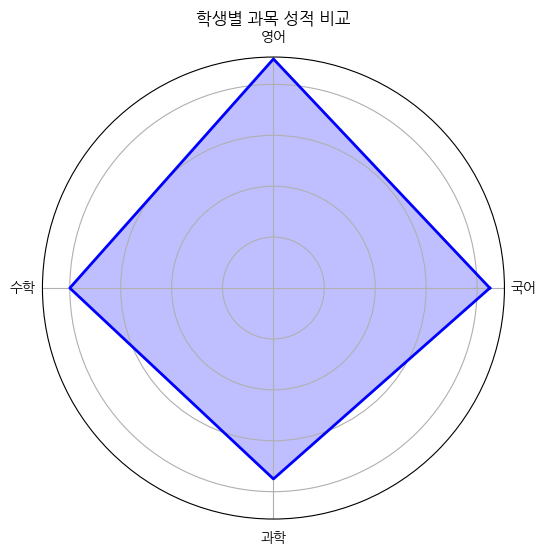

In [64]:
import numpy as np

# 학생 성적 예시 데이터로 레이더 차트 생성
labels = ['국어', '영어', '수학', '과학']
scores = [85, 90, 80, 75]

# 레이더 차트 설정
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
scores += scores[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, scores, color='blue', alpha=0.25)
ax.plot(angles, scores, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('학생별 과목 성적 비교')
plt.show()

# 1. 매출과 비용의 시간에 따른 변화 분석 (시계열 분석)
**예시 그래프: 선 그래프**   
**인사이트:** 특정 월의 매출과 비용 데이터를 시계열 그래프로 그려보면, 계절에 따라 매출이 변화하거나 비용이 증가하는 경향을 발견할 수 있습니다. 예를 들어, 매출이 연말에 급격히 증가하는 경우 연말에 집중적인 마케팅을 하거나 재고를 확보하는 전략을 수립할 수 있습니다.

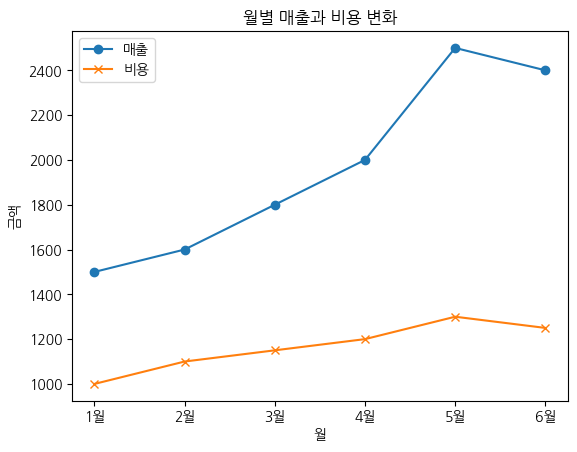

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 생성
data = {'월': ['1월', '2월', '3월', '4월', '5월', '6월'],
        '매출': [1500, 1600, 1800, 2000, 2500, 2400],
        '비용': [1000, 1100, 1150, 1200, 1300, 1250]}
df = pd.DataFrame(data)

# 시계열 선 그래프
plt.plot(df['월'], df['매출'], label='매출', marker='o')
plt.plot(df['월'], df['비용'], label='비용', marker='x')
plt.title('월별 매출과 비용 변화')
plt.xlabel('월')
plt.ylabel('금액')
plt.legend()
plt.show()


# 2. 제품별 판매량 비교 분석 (막대 그래프)
## 예시 그래프: 막대 그래프, 누적 막대 그래프
### 인사이트: 여러 제품의 판매량을 비교하는 막대 그래프를 통해, 가장 많이 판매된 제품과 그렇지 않은 제품을 한눈에 파악할 수 있습니다. 이 정보를 바탕으로 잘 팔리는 제품에 집중하여 생산과 마케팅 예산을 배분하거나, 판매량이 저조한 제품을 개선할 필요가 있는지 판단할 수 있습니다.

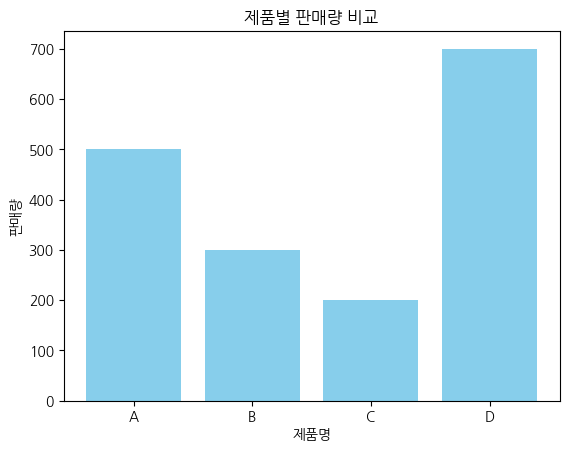

In [66]:
# 데이터 생성
data = {'제품명': ['A', 'B', 'C', 'D'],
        '판매량': [500, 300, 200, 700]}
df = pd.DataFrame(data)

# 막대 그래프
plt.bar(df['제품명'], df['판매량'], color='skyblue')
plt.title('제품별 판매량 비교')
plt.xlabel('제품명')
plt.ylabel('판매량')
plt.show()


# 3. 변수 간 상관 관계 파악 (산점도와 상관 관계 히트맵)
## 예시 그래프: 산점도, 상관 관계 히트맵
### 인사이트: 예를 들어 광고비와 매출 사이의 상관 관계를 시각화하면, 광고비가 증가할수록 매출도 증가하는 경향이 있는지 확인할 수 있습니다. 이 상관 관계가 높다면, 광고비를 더 투자하는 전략이 매출을 증가시킬 가능성이 높다고 판단할 수 있습니다.

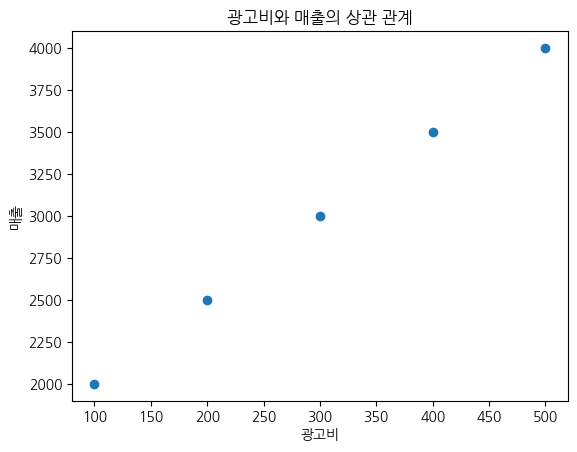

In [68]:
# 데이터 생성
data = {'광고비': [100, 200, 300, 400, 500],
        '매출': [2000, 2500, 3000, 3500, 4000]}
df = pd.DataFrame(data)

# 산점도와 상관 관계
plt.scatter(df['광고비'], df['매출'])
plt.title('광고비와 매출의 상관 관계')
plt.xlabel('광고비')
plt.ylabel('매출')
plt.show()


# 4. 제품 리뷰 분석 (워드클라우드 및 파이 차트)
## 예시 그래프: 워드클라우드, 파이 차트
### 인사이트: 리뷰 데이터를 분석하여 긍정적, 부정적인 키워드를 워드클라우드로 시각화하거나 파이 차트로 긍정적/부정적 리뷰의 비율을 확인할 수 있습니다. 이 분석을 통해 고객이 제품에서 특히 좋아하는 점과 불만족하는 점을 파악할 수 있습니다. 긍정적인 피드백은 마케팅 자료로 활용하고, 부정적인 피드백은 제품 개선에 반영할 수 있습니다.

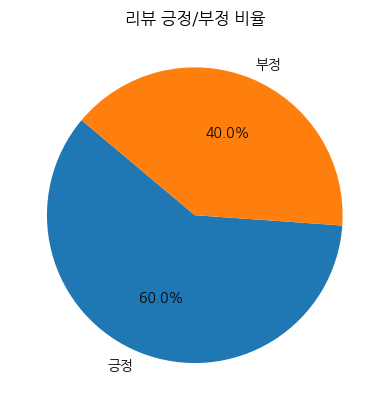

In [69]:
# 데이터 생성
data = {'리뷰 내용': ["제품 품질이 매우 좋아요", "배송이 느려요", "디자인이 마음에 들어요", "가격이 비싸요", "내구성이 좋습니다"],
        '긍정/부정': ['긍정', '부정', '긍정', '부정', '긍정']}
df = pd.DataFrame(data)

# 긍정/부정 비율 파이 차트
positive_count = df['긍정/부정'].value_counts()
positive_count.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('리뷰 긍정/부정 비율')
plt.ylabel('')
plt.show()


# 1. 기온 상승에 따른 해수면 상승 (시계열 선 그래프)
## 시각화 방법: 시계열 선 그래프
### 데이터 예시: 연도별 평균 해수면 높이, 지구 평균 기온 변화
인사이트: 여러 해 동안의 기온 상승과 해수면 높이 변화를 나란히 시각화하여, 기온 상승이 해수면 상승에 미치는 영향을 직관적으로 파악할 수 있습니다. 연도별 변화를 선 그래프로 나타내면, 최근 몇십 년간 해수면 상승 속도가 증가하고 있음을 확인할 수 있습니다.

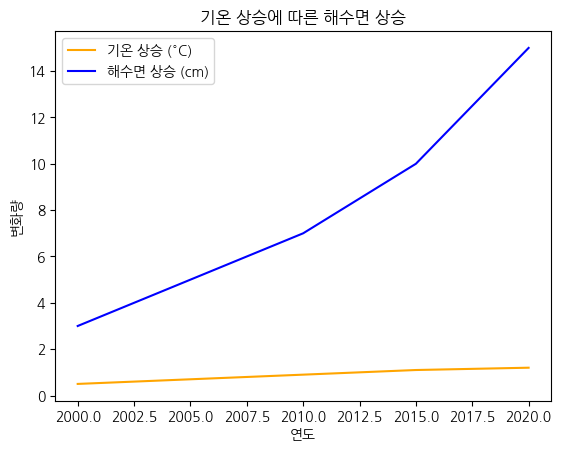

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터
data = {'연도': [2000, 2005, 2010, 2015, 2020],
        '기온 상승(°C)': [0.5, 0.7, 0.9, 1.1, 1.2],
        '해수면 상승(cm)': [3, 5, 7, 10, 15]}
df = pd.DataFrame(data)

# 시계열 선 그래프
plt.plot(df['연도'], df['기온 상승(°C)'], label='기온 상승 (°C)', color='orange')
plt.plot(df['연도'], df['해수면 상승(cm)'], label='해수면 상승 (cm)', color='blue')
plt.xlabel('연도')
plt.ylabel('변화량')
plt.title('기온 상승에 따른 해수면 상승')
plt.legend()
plt.show()


# 2. 종 다양성 감소 (히스토그램 및 밀도 그래프)
## 시각화 방법: 히스토그램 및 밀도 그래프
### 데이터 예시: 특정 지역의 연도별 종수 (종의 다양성)
인사이트: 특정 지역의 생물 종 다양성을 연도별로 시각화하여, 생물 다양성이 감소하는 추세를 확인할 수 있습니다. 밀도 그래프를 추가하면 시간에 따라 특정 종이 사라지거나 감소하는 패턴을 더욱 명확히 파악할 수 있습니다.

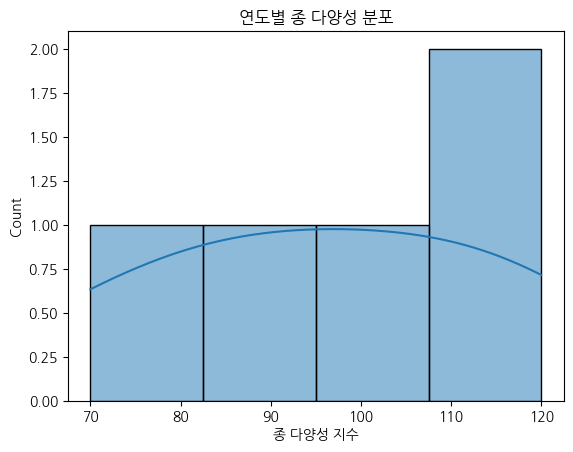

In [73]:
import seaborn as sns

# 예시 데이터
data = {'연도': [2000, 2005, 2010, 2015, 2020],
        '종 다양성 지수': [120, 110, 95, 85, 70]}
df = pd.DataFrame(data)

# 히스토그램 및 밀도 그래프
sns.histplot(df['종 다양성 지수'], kde=True)
plt.title('연도별 종 다양성 분포')
plt.xlabel('종 다양성 지수')
plt.show()


# 3. 산림 파괴에 따른 탄소 배출량 변화 (막대 그래프)
## 시각화 방법: 막대 그래프
### 데이터 예시: 연도별 산림 면적 감소와 탄소 배출량 증가
인사이트: 산림 파괴가 탄소 배출량에 미치는 영향을 분석하기 위해, 연도별 산림 면적 감소와 이에 따른 탄소 배출량 증가를 막대 그래프로 비교할 수 있습니다. 이를 통해 산림 면적이 줄어들수록 탄소 배출량이 급격히 증가하는 경향을 쉽게 파악할 수 있습니다.

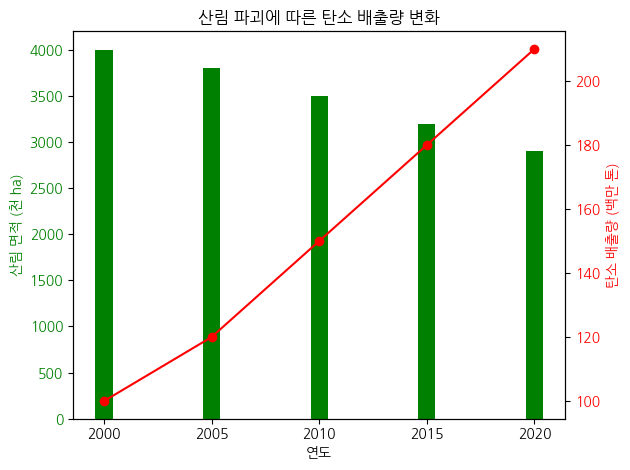

In [74]:
# 예시 데이터
data = {'연도': [2000, 2005, 2010, 2015, 2020],
        '산림 면적(천 ha)': [4000, 3800, 3500, 3200, 2900],
        '탄소 배출량(백만 톤)': [100, 120, 150, 180, 210]}
df = pd.DataFrame(data)

# 이중 축 막대 그래프
fig, ax1 = plt.subplots()

# 왼쪽 y축: 산림 면적 감소
ax1.bar(df['연도'], df['산림 면적(천 ha)'], color='green', label='산림 면적')
ax1.set_xlabel('연도')
ax1.set_ylabel('산림 면적 (천 ha)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# 오른쪽 y축: 탄소 배출량 증가
ax2 = ax1.twinx()
ax2.plot(df['연도'], df['탄소 배출량(백만 톤)'], color='red', marker='o', label='탄소 배출량')
ax2.set_ylabel('탄소 배출량 (백만 톤)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('산림 파괴에 따른 탄소 배출량 변화')
fig.tight_layout()
plt.show()


# 4. 특정 지역의 공기 오염 물질 농도 변화 (히트맵)
## 시각화 방법: 히트맵
### 데이터 예시: 월별 대기 오염 물질 (PM2.5, 이산화탄소, 오존 등) 농도
인사이트: 특정 지역에서 대기 오염 물질이 시간에 따라 어떻게 변하는지 히트맵으로 나타냄으로써 오염 농도가 높아지는 계절을 파악할 수 있습니다. 특정 오염 물질이 특정 기간에만 농도가 높아진다면, 그 시기에 대한 추가적인 조치가 필요할 수 있음을 알 수 있습니다.

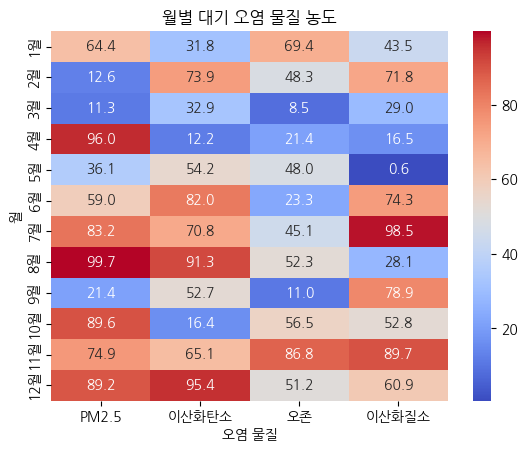

In [75]:
import numpy as np
import seaborn as sns

# 예시 데이터
months = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
pollutants = ['PM2.5', '이산화탄소', '오존', '이산화질소']
data = np.random.rand(12, 4) * 100  # 임의의 오염 농도 데이터 생성
df = pd.DataFrame(data, columns=pollutants, index=months)

# 히트맵 그리기
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('월별 대기 오염 물질 농도')
plt.xlabel('오염 물질')
plt.ylabel('월')
plt.show()


# 5. 해양 생물 다양성 감소 (파이 차트 및 누적 선 그래프)
## 시각화 방법: 파이 차트 및 누적 선 그래프
# 데이터 예시: 연도별 해양 생물 종수, 주요 해양 생물군 (어류, 조류, 포유류 등)의 비율
인사이트: 특정 기간 동안 해양 생물의 종 수가 감소하는 경향과, 감소의 주 원인이 되는 주요 생물군을 파악할 수 있습니다. 파이 차트는 각 생물군의 비율을 시각적으로 표현하고, 누적 선 그래프는 시간이 지남에 따라 전체 생물 다양성이 어떻게 변화했는지 한눈에 볼 수 있게 합니다.

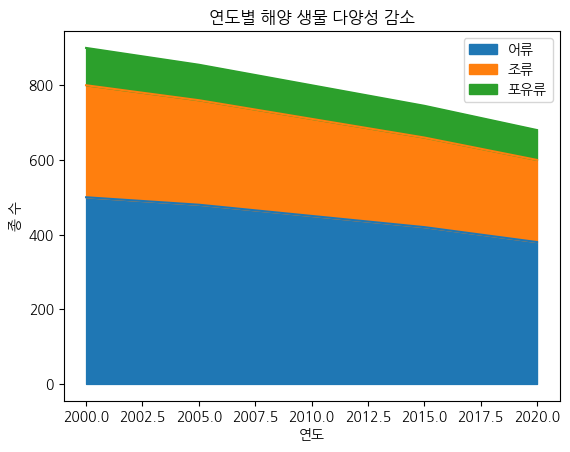

In [76]:
# 예시 데이터
data = {'연도': [2000, 2005, 2010, 2015, 2020],
        '어류': [500, 480, 450, 420, 380],
        '조류': [300, 280, 260, 240, 220],
        '포유류': [100, 95, 90, 85, 80]}
df = pd.DataFrame(data)
df.set_index('연도', inplace=True)

# 누적 선 그래프
df.plot(kind='area', stacked=True)
plt.title('연도별 해양 생물 다양성 감소')
plt.xlabel('연도')
plt.ylabel('종 수')
plt.show()
